In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# 상수 tensor 만들기
a = tf.constant(2.0)
y = tf.constant(8.0)
# 변수 tensor 만들기
x = tf.Variable(10.0)

# 계산하기
loss  = tf.math.abs(a*x-y)

# 값만 가져오기
loss.numpy()

12.0

In [14]:
def train_func():
    with tf.GradientTape() as tape:
        loss = tf.math.abs(a*x - y)

    dx = tape.gradient(loss, x)
    print('x = {}, dx = {}'.format(x.numpy(), dx))

    x.assign(x - dx) # x = x - dx
# Run train_func() UDF repeately
for i in range(4):
    train_func()

x = 4.0, dx = 0.0
x = 4.0, dx = 0.0
x = 4.0, dx = 0.0
x = 4.0, dx = 0.0


GradientTape : https://www.tensorflow.org/guide/autodiff?hl=ko
##### - 역전파를 사용해서 테이프에 기록된 연산의 그래디언트를 자동으로 계산하는 것

In [32]:
%%time

# 데이터 집합 생성
x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5

# 계수 설정 : 초기값
lr = 0.001

w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)

# 학습
histLoss = []
for epoch in range(1, 10001):
    with tf.GradientTape() as tape:
        # 예측값 - 실제값의 제곱의 평균에 루트 (RMSE)
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))
    
        dw1, dw2, db = tape.gradient(loss, [w1, w2, b])
        
        # assign은 괄호 내의 값을 할당하는 것이고 assign_sub(substitute)는 괄호 내의 값을 변수에서 빼서 할당하는 것
        # 더할려면 assign_add
        w1.assign_sub(lr*dw1) # w1 = w1-lr*dw1
        w2.assign_sub(lr*dw2) # w2 = w2-lr*dw2
        b.assign_sub(lr*db)
        
        histLoss.append(loss)
        if epoch%1000 == 0:
            print("epoch = {}, loss = {}".format(epoch, loss))

epoch = 1000, loss = 2.3891165256500244
epoch = 2000, loss = 1.8696733713150024
epoch = 3000, loss = 1.427135944366455
epoch = 4000, loss = 0.9846198558807373
epoch = 5000, loss = 0.5421039462089539
epoch = 6000, loss = 0.09958796203136444
epoch = 7000, loss = 0.06281432509422302
epoch = 8000, loss = 0.06271672248840332
epoch = 9000, loss = 0.06271672248840332
epoch = 10000, loss = 0.06271672248840332
CPU times: user 12.3 s, sys: 67.3 ms, total: 12.4 s
Wall time: 12.5 s



추정 결과 :
w1 = 2.01
w2 = 3.00
b = 5.00
final loss = 0.0627


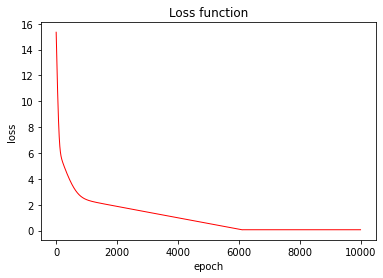

In [33]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())
print("final loss = %.4f" % loss.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# SGD + Momentum

##### 방향을 조절해 보자!

In [35]:
import tensorflow as tf
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

In [37]:
%%time
# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5

# 그래프를 생성한다.   
w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1, w2, b]  # variable list

# SGD optimizers 기능을 사용하고, Momentum 방법을 사용한다. (momentum 0으로 주면 그냥 SGD)
# Nesterov momentum 할지 말지 결정
opt = optimizers.SGD(learning_rate=0.001, momentum=0.7, decay=0, nesterov=False)

histLoss = []
for epoch in range(1,10001):
    with tf.GradientTape() as tape:
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))
        
    grads = tape.gradient(loss, var_list)
    
    # optimizer를 사용하여 업데이트 해보자!
    # 직접 assign하지 않고 opt에게 업데이트 역할을 맡기는 것.
    opt.apply_gradients(zip(grads, var_list))
    
    if epoch % 1000 == 0:
        histLoss.append(loss.numpy())
        print("epoch = {}, loss ={:.4f}".format(epoch, loss))

epoch = 1000, loss =1.2869
epoch = 2000, loss =0.0363
epoch = 3000, loss =0.0363
epoch = 4000, loss =0.0363
epoch = 5000, loss =0.0363
epoch = 6000, loss =0.0363
epoch = 7000, loss =0.0363
epoch = 8000, loss =0.0363
epoch = 9000, loss =0.0363
epoch = 10000, loss =0.0363
CPU times: user 18 s, sys: 86.5 ms, total: 18.1 s
Wall time: 18.3 s


## ↳ 전체 걸리는 시간이 더 걸리더라도 수렴하는 속도가 빠르다


추정 결과 :
w1 = 2.00
w2 = 3.00
b = 5.00
final loss = 0.0363


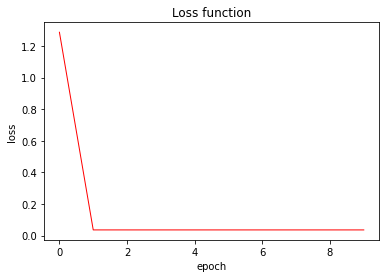

In [38]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())
print("final loss = %.4f" % loss.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Adam + minimize()

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5

# 그래프를 생성한다.   
w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)

In [41]:
def loss():
    return tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b -y)))

# epsilon도 넣을 수 있음. default는 1e-7 (안정적인 계산을 위해 작은 상수값 더해주는 것)
opt = optimizers.Adam(learning_rate=0.01)

histLoss = []

for epoch in range(1, 10001):
    # 원래는 GradientTape() -> tape.gradient() -> opt.apply_graients 해야하는데 이걸 minimize로 묶을 수 있음.
    # minimize 내에서 함수에 대한 정의와 파라미터들을 받아서 자동으로 함수에 적용함.
    opt.minimize(loss, var_list=[w1, w2, b])
    
    histLoss.append(loss())
    if epoch % 1000 == 0:
        print("epoch = {}, loss ={:.4f}".format(epoch, histLoss[-1]))

epoch = 1000, loss =0.0062
epoch = 2000, loss =0.0062
epoch = 3000, loss =0.0062
epoch = 4000, loss =0.0062
epoch = 5000, loss =0.0062
epoch = 6000, loss =0.0062
epoch = 7000, loss =0.0062
epoch = 8000, loss =0.0062
epoch = 9000, loss =0.0062
epoch = 10000, loss =0.0062



추정 결과 :
w1 = 2.00
w2 = 3.00
b = 5.00


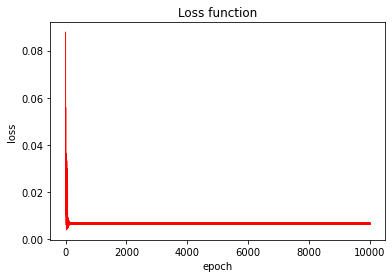

In [42]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Keras 
##### Sequential과 API는 모델의 복잡도에 따라 사용할 때 편의성이 달라질 수 있다. 자세한 내용은 아래의 링크 참고하기
##### https://theonly1.tistory.com/2712

## Sequential model

Epoch 1/300
10/10 [==============================] - 0s 1ms/step - loss: 470.7134
Epoch 2/300
10/10 [==============================] - 0s 2ms/step - loss: 280.5119
Epoch 3/300
10/10 [==============================] - 0s 2ms/step - loss: 155.3335
Epoch 4/300
10/10 [==============================] - 0s 1ms/step - loss: 99.4750
Epoch 5/300
10/10 [==============================] - 0s 2ms/step - loss: 61.6915
Epoch 6/300
10/10 [==============================] - 0s 1ms/step - loss: 46.9676
Epoch 7/300
10/10 [==============================] - 0s 2ms/step - loss: 34.7184
Epoch 8/300
10/10 [==============================] - 0s 1ms/step - loss: 25.5318
Epoch 9/300
10/10 [==============================] - 0s 2ms/step - loss: 18.4151
Epoch 10/300
10/10 [==============================] - 0s 2ms/step - loss: 13.2541
Epoch 11/300
10/10 [==============================] - 0s 1ms/step - loss: 9.8365
Epoch 12/300
10/10 [==============================] - 0s 2ms/step - loss: 7.2021
Epoch 13/300
10/10 [====

10/10 [==============================] - 0s 1ms/step - loss: 1.3159e-06
Epoch 101/300
10/10 [==============================] - 0s 1ms/step - loss: 1.0079e-06
Epoch 102/300
10/10 [==============================] - 0s 972us/step - loss: 7.6906e-07
Epoch 103/300
10/10 [==============================] - 0s 1ms/step - loss: 5.9518e-07
Epoch 104/300
10/10 [==============================] - 0s 869us/step - loss: 4.5164e-07
Epoch 105/300
10/10 [==============================] - 0s 2ms/step - loss: 3.4053e-07
Epoch 106/300
10/10 [==============================] - 0s 946us/step - loss: 2.5704e-07
Epoch 107/300
10/10 [==============================] - 0s 1ms/step - loss: 1.9327e-07
Epoch 108/300
10/10 [==============================] - 0s 2ms/step - loss: 1.4427e-07
Epoch 109/300
10/10 [==============================] - 0s 1ms/step - loss: 1.0822e-07
Epoch 110/300
10/10 [==============================] - 0s 1ms/step - loss: 8.2465e-08
Epoch 111/300
10/10 [==============================] - 0s 945u

10/10 [==============================] - 0s 1ms/step - loss: 6.9940e-11
Epoch 196/300
10/10 [==============================] - 0s 1ms/step - loss: 6.9940e-11
Epoch 197/300
10/10 [==============================] - 0s 2ms/step - loss: 6.9940e-11
Epoch 198/300
10/10 [==============================] - 0s 2ms/step - loss: 6.9069e-11
Epoch 199/300
10/10 [==============================] - 0s 2ms/step - loss: 6.7155e-11
Epoch 200/300
10/10 [==============================] - 0s 2ms/step - loss: 6.6003e-11
Epoch 201/300
10/10 [==============================] - 0s 2ms/step - loss: 4.3857e-11
Epoch 202/300
10/10 [==============================] - 0s 3ms/step - loss: 3.7784e-11
Epoch 203/300
10/10 [==============================] - 0s 2ms/step - loss: 3.7784e-11
Epoch 204/300
10/10 [==============================] - 0s 2ms/step - loss: 3.7784e-11
Epoch 205/300
10/10 [==============================] - 0s 2ms/step - loss: 3.7784e-11
Epoch 206/300
10/10 [==============================] - 0s 2ms/step -

10/10 [==============================] - 0s 1ms/step - loss: 2.2677e-11
Epoch 291/300
10/10 [==============================] - 0s 2ms/step - loss: 8.7317e-12
Epoch 292/300
10/10 [==============================] - 0s 1ms/step - loss: 6.6581e-12
Epoch 293/300
10/10 [==============================] - 0s 2ms/step - loss: 6.6581e-12
Epoch 294/300
10/10 [==============================] - 0s 1ms/step - loss: 6.6581e-12
Epoch 295/300
10/10 [==============================] - 0s 1ms/step - loss: 6.6581e-12
Epoch 296/300
10/10 [==============================] - 0s 2ms/step - loss: 6.6581e-12
Epoch 297/300
10/10 [==============================] - 0s 2ms/step - loss: 6.6581e-12
Epoch 298/300
10/10 [==============================] - 0s 1ms/step - loss: 6.6581e-12
Epoch 299/300
10/10 [==============================] - 0s 932us/step - loss: 6.6581e-12
Epoch 300/300
10/10 [==============================] - 0s 2ms/step - loss: 6.6581e-12

추정 결과 :
w1 = 2.00
w2 = 3.00
b = 5.00


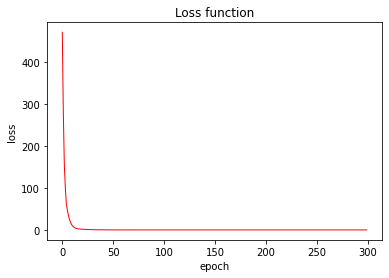

In [69]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
# T 안하면 X^2과 X가 각기 다른 array로 들어가 있음. 둘을 묶어 주기 위해 T하는 것.
dataX = np.stack([x*x, x]).T

# 그래프를 생성한다.
model = Sequential()
model.add(Dense(1, input_dim = 2))
model.compile(loss='mse',optimizer=optimizers.Adam(lr=0.05))
h = model.fit(dataX, y, batch_size = 10, epochs = 300)

# 학습 결과를 확인한다.
# 모델에 추가된 층에서 w1, w2, b(파라미터들)의 값을 가져오는 방법
parameters = model.layers[0].get_weights()
# 파라미터의 구조 [array([[w1], [w2]], dtype), array([b], dtype)]
print("\n추정 결과 :")
print("w1 = %.2f" % parameters[0][0][0])
print("w2 = %.2f" % parameters[0][1][0])
print("b = %.2f" % parameters[1][0])

plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [70]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [62]:
# parameters 내부 구조 확인
print(parameters)
print(parameters[0])
print(parameters[1])
print(parameters[0][0])
print(parameters[0][1])

[array([[2.0000017],
       [3.       ]], dtype=float32), array([4.999979], dtype=float32)]
[[2.0000017]
 [3.       ]]
[4.999979]
[2.0000017]
[3.]


## Functional API

Epoch 1/300
4/4 [==============================] - 0s 2ms/step - loss: 1054.7808
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 906.6873
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 779.3853
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 652.7470
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 548.3221
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 454.9638
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 372.4194
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 304.2546
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 245.0450
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 197.8301
Epoch 11/300
4/4 [==============================] - 0s 2ms/step - loss: 154.1796
Epoch 12/300
4/4 [==============================] - 0s 2ms/step - loss: 120.4577
Epoch 13/300
4/4 [==================

4/4 [==============================] - 0s 2ms/step - loss: 0.3343
Epoch 105/300
4/4 [==============================] - 0s 2ms/step - loss: 0.3241
Epoch 106/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3137
Epoch 107/300
4/4 [==============================] - 0s 13ms/step - loss: 0.3036
Epoch 108/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2943
Epoch 109/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2845
Epoch 110/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2757
Epoch 111/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2673
Epoch 112/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2583
Epoch 113/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2502
Epoch 114/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2417
Epoch 115/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2340
Epoch 116/300
4/4 [==============================] - 

4/4 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 207/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 208/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 209/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 210/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 211/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 212/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 213/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 214/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 215/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 216/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 217/300
4/4 [==============================] - ETA: 0s - loss: 0.003 - 0s 2ms/step - loss: 0.0033
Epoch 218/300
4/4 [===========

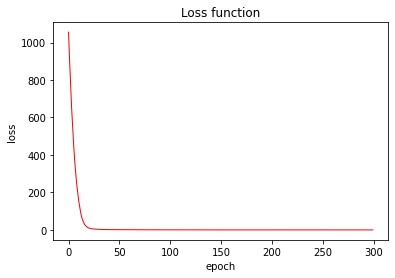

In [80]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
dataX = np.stack([x*x, x]).T

# 그래프를 생성한다.   
xInput = Input(batch_shape=(None, 2))
yOutput = Dense(1)(xInput)

# 처음 인풋과 아웃풋 지정하기
model = Model(xInput, yOutput)
model.compile(loss='mse', optimizer = optimizers.Adam(lr=0.05))
h = model.fit(dataX, y, epochs = 300)

# 학습 결과를 확인한다.
parameters = model.layers[1].get_weights()
print("\n추정 결과 :")
print("w1 = %.2f" % parameters[0][0][0])
print("w2 = %.2f" % parameters[0][1][0])
print("b = %.2f" % parameters[1][0])

plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [79]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# tensorflow 1.4로 iris 분류

In [81]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [82]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [85]:
iris = datasets.load_iris()
iris_X = iris.data
# get_dummies를 통해 onehot 형태로 라벨 바꿔주기
iris_y = pd.get_dummies(iris.target).to_numpy()

In [86]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, 
                                                    test_size=0.3,
                                                    random_state=1)

In [87]:
# X와 y를 저장할 변수 선언 (단순히 공간을 만드는 것 - 값은 아직 없음)
x = tf.placeholder(tf.float32, [None, 4]) # 변수 수가 4개
y = tf.placeholder(tf.float32, [None, 3]) # 분류 클래스 수가 3개

In [89]:
# Weight와 bias를 저장할 변수 선언
# zeros보다는 random하는 게 나을 듯
W = tf.Variable(tf.zeros([4, 3]))
b = tf.Variable(tf.zeros([3]))

In [90]:
# 출력을 정의
h = tf.nn.softmax(tf.matmul(x, W) + b)

In [91]:
# 손실함수 정의
cross_entropy = -tf.reduce_sum(y*tf.log(h), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)

In [92]:
# 학습(훈련) 정의(옵티마이저, 학습률)
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [93]:
init = tf.global_variables_initializer()

In [94]:
# tf1 은 세션 필요
sess = tf.Session()
sess.run(init)

In [95]:
for i in range(100000):
    _, loss_value = sess.run([train, loss], feed_dict={x:train_X, y:train_y})
    if i%10000 == 0:
        print(i, loss_value)

0 1.0986123
10000 0.34161025
20000 0.25733852
30000 0.21406321
40000 0.18752667
50000 0.16956551
60000 0.1565753
70000 0.14672597
80000 0.13898851
90000 0.13273859


In [96]:
correct_prediction = tf.equal(tf.argmax(h, 1), tf.argmax(y, 1))

In [97]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [98]:
print(sess.run(accuracy, feed_dict={x:test_X, y:test_y}))

0.9777778


# Keras 

In [ ]:
import tensorflow as tf

In [ ]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [ ]:
%time


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Test Accuracy: 0.933


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:

%time


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
Test Accuracy: 1.000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


# Functional API

In [ ]:
i     = Input(shape=(n_features,)) # 입력레이어
n     = Dense(10)(i)
n     = Dense(8)(n)
o     = Dense(3, activation='softmax')(n) # 출력레이어
model = Model(inputs=i, outputs=o) # 모델을 만든다

In [ ]:
%time


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
Test Accuracy: 1.000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
